In [48]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np    

%matplotlib inline
from plotly.offline import plot, iplot
import plotly.graph_objs as go
from plotly.graph_objs import Layout
import plotly
from plotly.subplots import make_subplots

import matplotlib.ticker as ticker


from matplotlib import rc
plt.rcParams['axes.grid'] = False
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 20})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 2

#rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)
plt.rcParams["legend.loc"] = 'best'
import matplotlib.colors as colors

In [49]:
UT = 12   # UT
alt = 400

## Load the TIEGCM state using read_tiegcm()

In [50]:
import sys  
sys.path.insert(0, 'util_funcs/')
from read_tiegcm import read_tiegcm

variables = ['lon','lat','DEN','TN' ,'ut','ilev','ZG','f107d','f107a','Kp','HE', 'O1', 'O2', 'N2', 'UN', 'VN']

path_spring_equinox = '/homes/zawa8770/Documents/msis2/data_files/2005/s078.nc'#'E:/data/day_night_data/TIEGCM_2002_2010/2004/s006.nc' 
tiegcm_spring_equinox = read_tiegcm(path_spring_equinox, variables)
tiegcm_spring_equinox  = tiegcm_spring_equinox[0]


## Load the MSIS2.0 state using pymsis


In [51]:
import numpy as np
from pymsis import msis

f107   = tiegcm_spring_equinox['f107d'].mean()
f107a  = tiegcm_spring_equinox['f107a'].mean()
ap = 2
aps = [[ap]*7]
alts   = alt
lons = np.arange(-180, 185, 5)
lats = np.arange(-90, 95, 5)

output = msis.run(datetime(2005, 3, 19, UT, 0, 0), lons, lats, alts, f107, f107a, aps, version=2)



12.0
X_tiegcm (36, 72)
Y_tiegcm (36, 72)
X_msis (37, 73)
Y_msis (37, 73)


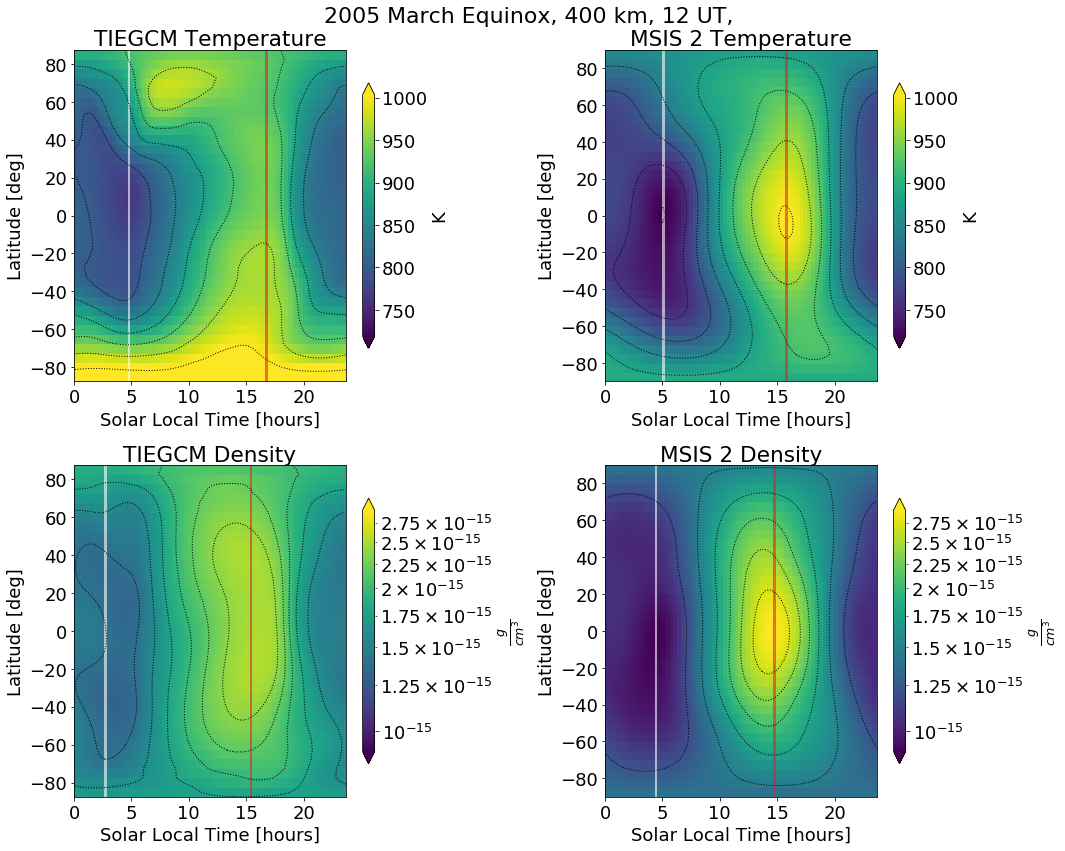

In [69]:

def make_tiegcm_msis_contours(atmos, lons_msis, lats_msis, alts_msis, tiegcm, plotdate):
    
    plt.rcParams['axes.grid'] = False
    plt.rcParams['grid.alpha'] = 1
    plt.rcParams['grid.color'] = "#cccccc"
    plt.rcParams.update({'font.size': 18})
    rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
    plt.rcParams['axes.titlesize']='large' 
    plt.rcParams['axes.titlepad']= 2

    #rc('font',**{'family':'serif','serif':['Palatino']})
    # rc('text', usetex=True)
    plt.rcParams["legend.loc"] = 'best'

    #TIEGCM STUFF
    lon = tiegcm['lon']
    lat = tiegcm['lat']
    ut  = tiegcm['ut']
    
    ut_index = np.where(tiegcm['ut']==UT)[0][0]  # for tiegcm indexing
    print(tiegcm['ut'][ut_index])
    calc_slt = np.mod(lon/15 + ut[ut_index], 24)
    slt  = np.sort(calc_slt)
    islt = np.argsort(calc_slt)
    
    x_tiegcm = slt
    y_tiegcm = lat
    X_tiegcm, Y_tiegcm = np.meshgrid(x_tiegcm, y_tiegcm)


    interp_temp = np.zeros(  (np.size(tiegcm['lon']), np.size(tiegcm['lat'])))
    for ilon,lonval in enumerate(tiegcm['lon']):
        for ilat,latval in enumerate(tiegcm['lat']):
            interp_temp[ilon, ilat] =  np.interp( alt*1e5  ,tiegcm['ZG'][ut_index, :,  ilat, ilon], tiegcm['TN'][ut_index,:,  ilat, ilon]) 

    interp_den = np.zeros(  (np.size(tiegcm['lon']), np.size(tiegcm['lat'])))
    for ilon,lonval in enumerate(tiegcm['lon']):
        for ilat,latval in enumerate(tiegcm['lat']):
            interp_den[ilon, ilat] =  np.exp( np.interp( alt*1e5  ,tiegcm['ZG'][ut_index,:,  ilat, ilon], np.log(tiegcm['DEN'][ut_index,:,  ilat, ilon]))  )

    

    plot_data1_tiegcm = np.transpose(interp_temp)

    plot_data2_tiegcm = np.transpose(interp_den*1e3) # NOTE UNIT CHANGE


    # MSIS stuff:
#     time_msis = np.asarray(atmos.time)
    alt_km_msis = alts_msis
    lat_msis = lats_msis
    lon_msis = lons_msis
    Den_msis = np.transpose(np.squeeze(output)[:,:,0])

    Temp_msis = np.transpose(np.squeeze(output)[:,:,10])


    calc_slt = np.mod(lon_msis/15 + UT, 24)
    # calc_slt
    slt_msis  = np.sort(calc_slt)
    islt_msis = np.argsort(calc_slt)

    plot_data1_msis = Temp_msis
    plot_data2_msis = Den_msis
    x_msis = slt_msis
    y_msis = lat_msis
    X_msis, Y_msis = np.meshgrid(x_msis, y_msis)
    
    print('X_tiegcm',np.shape(X_tiegcm))
    print('Y_tiegcm',np.shape(Y_tiegcm))

    
    print('X_msis',np.shape(X_msis))
    print('Y_msis',np.shape(Y_msis))


    max_plot_dens = 2e-11
    max_plot_temp = 1660

    min_plot_dens = 5*1e-13
    min_plot_temp = 700

    
    param_units2 =  r'$\frac{g}{cm^3}$'
#     param_units2 =  'g/cm^-3'

    plot_title2 = 'Density'
    x_string = 'Solar Local Time [hours]'
    y_string = 'Latitude [deg]'
    param_units =  'K'
    plot_title1 = 'Temperature'


    fig, (ax1) = plt.subplots(2,2 , figsize=(15, 12))
#     fig.suptitle( 'Temperature and Density Comparison \n'+plotdate +', 400 km, 12 UT,', y=1.025, size=22 )
    fig.suptitle(plotdate +', 400 km, 12 UT,', y=.99, size=22 )

    contours = ax1[0,0].pcolor(X_tiegcm, Y_tiegcm, plot_data1_tiegcm, vmin = plot_data1_msis.min(), vmax= plot_data1_msis.max())
    contours_over = ax1[0,0].contour(X_tiegcm, Y_tiegcm, plot_data1_tiegcm, 7, colors='black', linewidths= 1,linestyles= 'dotted' )
    ax1[0,0].set_title('TIEGCM '+plot_title1)
    ax1[0,0].set(xlabel=x_string, 
            ylabel=y_string,
            title ='TIEGCM '+plot_title1 )
    cbar = fig.colorbar(contours, extend='both', shrink=0.8, ax=ax1[0,0])
    cbar.set_label(param_units)


    contours = ax1[0,1].pcolor(X_msis, Y_msis, plot_data1_msis, vmin = plot_data1_msis.min(), vmax= plot_data1_msis.max())
    contours_over = ax1[0,1].contour(X_msis, Y_msis, plot_data1_msis, 7, colors='black', linewidths= 1,linestyles= 'dotted' )
    ax1[0,1].set_title('MSIS 2 '+plot_title1)
    ax1[0,1].set(xlabel=x_string, 
            ylabel=y_string,
            title ='MSIS 2 '+plot_title1 )
    cbar = fig.colorbar(contours, extend='both', shrink=0.8, ax=ax1[0,1])
    cbar.set_label(param_units)


    contours = ax1[1,0].pcolor(X_tiegcm, Y_tiegcm, plot_data2_tiegcm/1000,  norm=colors.LogNorm(vmin= plot_data2_msis.min()/1000  , vmax = plot_data2_msis.max()/1000  )) #, norm=colors.LogNorm(vmin=5*1e-13, vmax=5*1e-8) )
    contours_over = ax1[1,0].contour(X_tiegcm, Y_tiegcm, plot_data2_tiegcm/1000, 7, colors='black', linewidths= 1,linestyles= 'dotted' )
    ax1[1,0].set_title('TIEGCM '+ plot_title2)
    ax1[1,0].set(xlabel=x_string, 
            ylabel=y_string,
            title ='TIEGCM '+ plot_title2 )
    cbar = fig.colorbar(contours, extend='both', shrink=0.8, ax=ax1[1,0])
    cbar.set_label(param_units2)

    contours = ax1[1,1].pcolor(X_msis, Y_msis, plot_data2_msis/1000,  norm=colors.LogNorm(vmin= plot_data2_msis.min()/1000  , vmax = plot_data2_msis.max()/1000  )) #, norm=colors.LogNorm(vmin=5*1e-13,  vmax= 5*1e-8  ))
    contours_over = ax1[1,1].contour(X_msis, Y_msis, plot_data2_msis/1000, 7, colors='black', linewidths= 1,linestyles= 'dotted' )
    ax1[1,1].set_title('MSIS 2 '+ plot_title2)
    ax1[1,1].set(xlabel=x_string, 
            ylabel = y_string,
            title  = 'MSIS 2 '+ plot_title2 )
    cbar = fig.colorbar(contours, extend='both', shrink=0.8, ax=ax1[1,1] )
    cbar.set_label(param_units2)

#     ax=ax1[1,1]
#     ticklabs = cbar.ax.get_yticklabels()
#     cbar.ax.set_yticklabels(ticklabs, fontsize=10)

#     cbar = plt.colorbar()
#     for t in cbar.ax.get_yticklabels():
#          t.set_fontsize(12)
#     for ax in fig.axes:
#     plt.sca(ax)
#     plt.xticks(rotation=45)
#     for ax in axs:
#         cbar.ax.tick_params(labelsize=10) 


    max_tiegcm_temp = x_tiegcm[np.where(plot_data1_tiegcm==plot_data1_tiegcm.max())[1][0]]
    max_tiegcm_den = x_tiegcm[np.where(plot_data2_tiegcm==plot_data2_tiegcm.max())[1][0]]
    max_msis_temp = x_msis[np.where(plot_data1_msis==plot_data1_msis.max())[1][0]]
    max_msis_den = x_msis[np.where(plot_data2_msis==plot_data2_msis.max())[1][0]]
    ax1[0,0].axvspan(max_tiegcm_temp, max_tiegcm_temp+.2 ,facecolor='tab:red', alpha=0.6)
    ax1[0,1].axvspan(max_msis_temp, max_msis_temp+.25 ,facecolor='tab:red', alpha=0.6)
    ax1[1,0].axvspan(max_tiegcm_den-.7, max_tiegcm_den-.5, facecolor='tab:red', alpha=0.6)
    ax1[1,1].axvspan(max_msis_den, max_msis_den+.2, facecolor='tab:red', alpha=0.6)

    min_tiegcm_temp = x_tiegcm[np.where(plot_data1_tiegcm==plot_data1_tiegcm.min())[1][0]]
    min_tiegcm_den = x_tiegcm[np.where(plot_data2_tiegcm==plot_data2_tiegcm.min())[1][0]]
    min_msis_temp = x_msis[np.where(plot_data1_msis==plot_data1_msis.min())[1][0]]
    min_msis_den = x_msis[np.where(plot_data2_msis==plot_data2_msis.min())[1][0]]
    ax1[0,0].axvspan(min_tiegcm_temp, min_tiegcm_temp+.2 ,facecolor='white', alpha=0.6)
    ax1[0,1].axvspan(min_msis_temp, min_msis_temp+.25 ,facecolor='white', alpha=0.6)
    ax1[1,0].axvspan(min_tiegcm_den-.7, min_tiegcm_den-.5, facecolor='white', alpha=0.6)
    ax1[1,1].axvspan(min_msis_den, min_msis_den+.2, facecolor='white', alpha=0.6)

    fig.tight_layout( pad=1)
#     plt.colorbar(contours, )
    plt.subplots_adjust(top=0.94)
    return(fig)


fig_spring_equinox = make_tiegcm_msis_contours(output, lons, lats, alts, tiegcm_spring_equinox, '2005 March Equinox')
fig_spring_equinox.savefig('plots/tiegcm_msis_contours_2005_march_equinox.png')





12.0
2.9201302834125364e-12
1021.9596921486005
9.038025861572707e-13
719.0568237304688


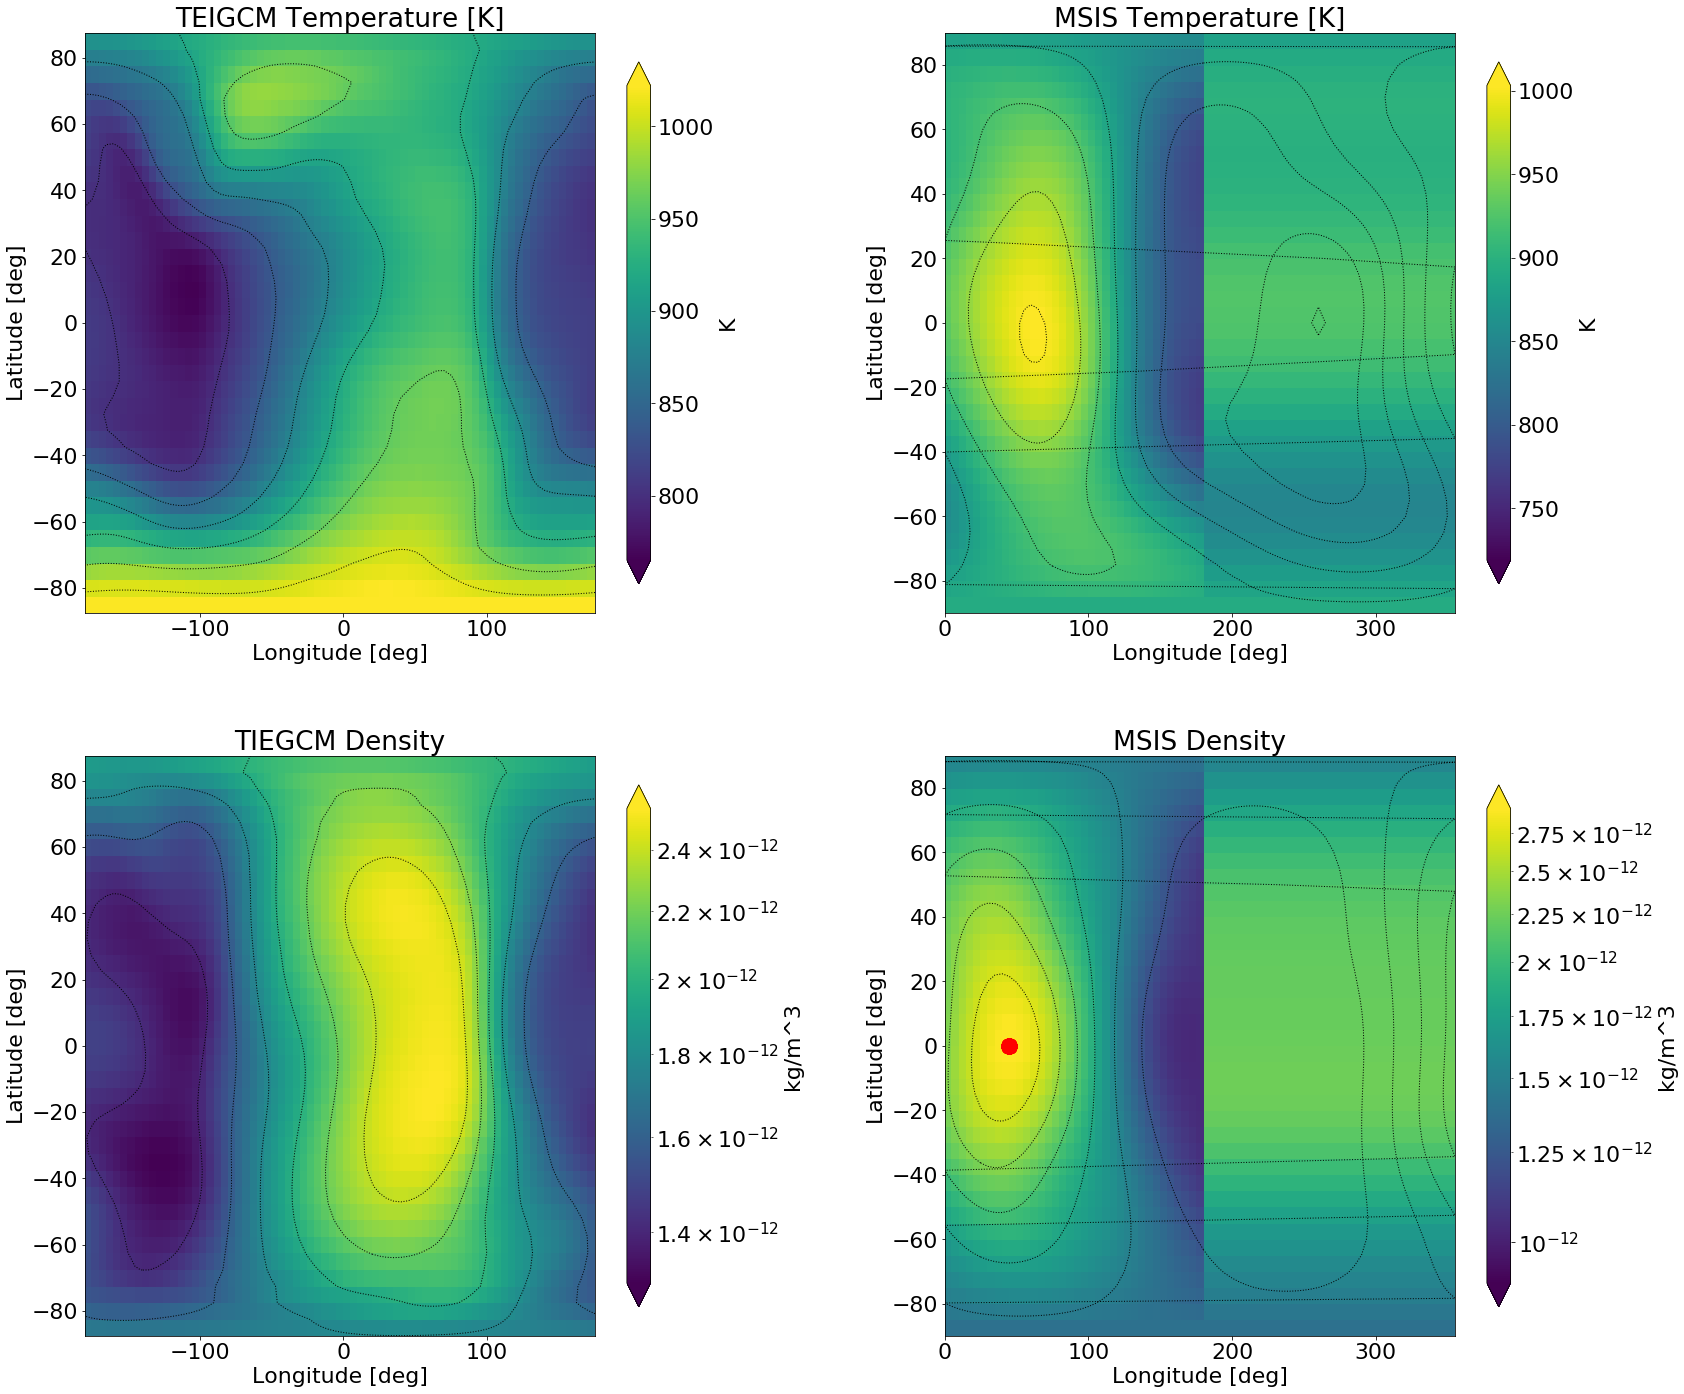

In [43]:



# def make_tiegcm_msis_contours(
# atmos =atmos_spring_equinox 
tiegcm = tiegcm_spring_equinox
    
plt.rcParams['axes.grid'] = False
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 22})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 2

#rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)
plt.rcParams["legend.loc"] = 'best'

#TIEGCM STUFF
lon = tiegcm['lon']
lat = tiegcm['lat']
ut  = tiegcm['ut']

ut_index = np.where(tiegcm['ut']==UT)[0][0]  # for tiegcm indexing
print(tiegcm['ut'][ut_index])
calc_slt = np.mod(lon/15 + ut[ut_index], 24)
slt  = np.sort(calc_slt)
islt = np.argsort(calc_slt)

x_tiegcm = lon
y_tiegcm = lat
X_tiegcm, Y_tiegcm = np.meshgrid(x_tiegcm, y_tiegcm)


interp_temp = np.zeros(  (np.size(tiegcm['lon']), np.size(tiegcm['lat'])))
for ilon,lonval in enumerate(tiegcm['lon']):
    for ilat,latval in enumerate(tiegcm['lat']):
        interp_temp[ilon, ilat] =  np.interp( alt*1e5  ,tiegcm['ZG'][ut_index, :,  ilat, ilon], tiegcm['TN'][ut_index,:,  ilat, ilon]) 

interp_den = np.zeros(  (np.size(tiegcm['lon']), np.size(tiegcm['lat'])))
for ilon,lonval in enumerate(tiegcm['lon']):
    for ilat,latval in enumerate(tiegcm['lat']):
        interp_den[ilon, ilat] =  np.exp( np.interp( alt*1e5  ,tiegcm['ZG'][ut_index,:,  ilat, ilon], np.log(tiegcm['DEN'][ut_index,:,  ilat, ilon]))  )



plot_data1_tiegcm = np.transpose(interp_temp)

plot_data2_tiegcm = np.transpose(interp_den*1e3) # NOTE UNIT CHANGE


# MSIS stuff:
alt_km_msis = alts
lat_msis = lats
lon_msis = lons
Den_msis = np.transpose(np.squeeze(output)[:,:,0])

Temp_msis = np.transpose(np.squeeze(output)[:,:,10])


calc_slt = np.mod(lon_msis/15 + UT, 24)
# calc_slt
slt_msis  = np.sort(calc_slt)
islt_msis = np.argsort(calc_slt)

plot_data1_msis = Temp_msis
plot_data2_msis = Den_msis
x_msis = lon_msis
y_msis = lat_msis
X_msis, Y_msis = np.meshgrid(x_msis, y_msis)

#     max_plot_dens = np.max([plot_data2_tiegcm.max(), plot_data2_msis.max()])
#     max_plot_temp = np.max([plot_data1_tiegcm.max(), plot_data1_msis.max()])

#     min_plot_dens = np.min([plot_data2_tiegcm.min(), plot_data2_msis.min()])
#     min_plot_temp = np.min([plot_data1_tiegcm.min(), plot_data1_msis.min()])

max_plot_dens = 2e-11
max_plot_temp = 1660

min_plot_dens = 5*1e-13
min_plot_temp = 700

print( np.max([plot_data2_tiegcm.max(), plot_data2_msis.max()]))
print(np.max([plot_data1_tiegcm.max(), plot_data1_msis.max()]))
print(np.min([plot_data2_tiegcm.min(), plot_data2_msis.min()]))
print(np.min([plot_data1_tiegcm.min(), plot_data1_msis.min()]))

param_units2 =  'kg/m^3'
plot_title2 = 'Density'
x_string = 'Longitude [deg]'
y_string = 'Latitude [deg]'
param_units =  'K'
plot_title1 = 'Temperature ['+param_units+']'


fig, (ax1) = plt.subplots(2,2 , figsize=(25, 21))
# fig.suptitle( '400km, 0 UT, Temperature and Density Comparison \n'+plotdate, y=1.0, size=35 )

contours = ax1[0,0].pcolor(X_tiegcm, Y_tiegcm, plot_data1_tiegcm)#, vmin = min_plot_temp, vmax= max_plot_temp)
contours_over = ax1[0,0].contour(X_tiegcm, Y_tiegcm, plot_data1_tiegcm, 7, colors='black', linewidths= 1,linestyles= 'dotted' )
ax1[0,0].set_title('TEIGCM '+plot_title1)
ax1[0,0].set(xlabel=x_string, 
        ylabel=y_string,
        title ='TEIGCM '+plot_title1 )
cbar = fig.colorbar(contours, extend='both', shrink=0.9, ax=ax1[0,0])
cbar.set_label(param_units)

contours = ax1[0,1].pcolor(X_msis, Y_msis, plot_data1_msis)#, vmin = min_plot_temp, vmax= max_plot_temp)
contours_over = ax1[0,1].contour(X_msis, Y_msis, plot_data1_msis, 7, colors='black', linewidths= 1,linestyles= 'dotted' )
ax1[0,1].set_title('MSIS '+plot_title1)
ax1[0,1].set(xlabel=x_string, 
        ylabel=y_string,
        title ='MSIS '+plot_title1 )
cbar = fig.colorbar(contours, extend='both', shrink=0.9, ax=ax1[0,1])
cbar.set_label(param_units)


contours = ax1[1,0].pcolor(X_tiegcm, Y_tiegcm, plot_data2_tiegcm,  norm=colors.LogNorm(vmin= plot_data2_tiegcm.min()  , vmax = plot_data2_tiegcm.max()  )) #, norm=colors.LogNorm(vmin=5*1e-13, vmax=5*1e-8) )
contours_over = ax1[1,0].contour(X_tiegcm, Y_tiegcm, plot_data2_tiegcm, 7, colors='black', linewidths= 1,linestyles= 'dotted' )
ax1[1,0].set_title('TEIGCM '+ plot_title2)
ax1[1,0].set(xlabel=x_string, 
        ylabel=y_string,
        title ='TIEGCM '+ plot_title2 )
cbar = fig.colorbar(contours, extend='both', shrink=0.9, ax=ax1[1,0])
cbar.set_label(param_units2)

contours = ax1[1,1].pcolor(X_msis, Y_msis, plot_data2_msis,  norm=colors.LogNorm(vmin= plot_data2_msis.min()  , vmax = plot_data2_msis.max()  )) #, norm=colors.LogNorm(vmin=5*1e-13,  vmax= 5*1e-8  ))
contours_over = ax1[1,1].contour(X_msis, Y_msis, plot_data2_msis, 7, colors='black', linewidths= 1,linestyles= 'dotted' )
ax1[1,1].set_title('MSIS '+ plot_title2)
ax1[1,1].set(xlabel=x_string, 
        ylabel = y_string,
        title  = 'MSIS '+ plot_title2 )
cbar = fig.colorbar(contours, extend='both', shrink=0.9, ax=ax1[1,1], )
cbar.set_label(param_units2)


###########    GET MAXIMUM AND MARK IT WITH A POINT  ########
# get maximum value in your data
max_value = np.max(plot_data2_msis)
# get position index of this calue in your data array 
local_max_index = np.where(plot_data2_msis==max_value)

## retrieve position of your
max_x = X_msis[local_max_index[0], local_max_index[1]]
max_y = Y_msis[local_max_index[0], local_max_index[1]]
max_y.shape

# plot one marker on this position
plt.plot(max_x *np.ones(np.size(X_msis,0)), max_y *np.ones(np.size(Y_msis,0)), color="red", marker = "o", zorder = 10, 
                                   markersize=15, clip_on=False)

fig.tight_layout( pad=3)
#     fig.savefig('ProjectPlots/Contour_TN_DEN_f107240' +".png")
#     return(fig)






# fig_spring_equinox = make_tiegcm_msis_contours(atmos_spring_equinox, tiegcm_spring_equinox, '2003 Spring Equinox')
# fig_summer_sols = make_tiegcm_msis_contours(atmos_summer_sols, tiegcm_summer_sols, '2003 Summer Solstice')
# fig_fall_equinox = make_tiegcm_msis_contours(atmos_fall_equinox, tiegcm_fall_equinox, '2003 Fall Equinox')
# fig_winter_sols = make_tiegcm_msis_contours(atmos_winter_sols, tiegcm_winter_sols, '2003 Winter Solstice')

# fig_spring_equinox.savefig('ProjectPlots/NightContour_spring_equinox_TN_DEN' +".png")
# fig_summer_sols.savefig('ProjectPlots/Contour_summer_sols_TN_DEN' +".png")
# fig_fall_equinox.savefig('ProjectPlots/Contour_fall_equinox_TN_DEN' +".png")
# fig_winter_sols.savefig('ProjectPlots/Contour_winter_sols_TN_DEN' +".png")



12.0


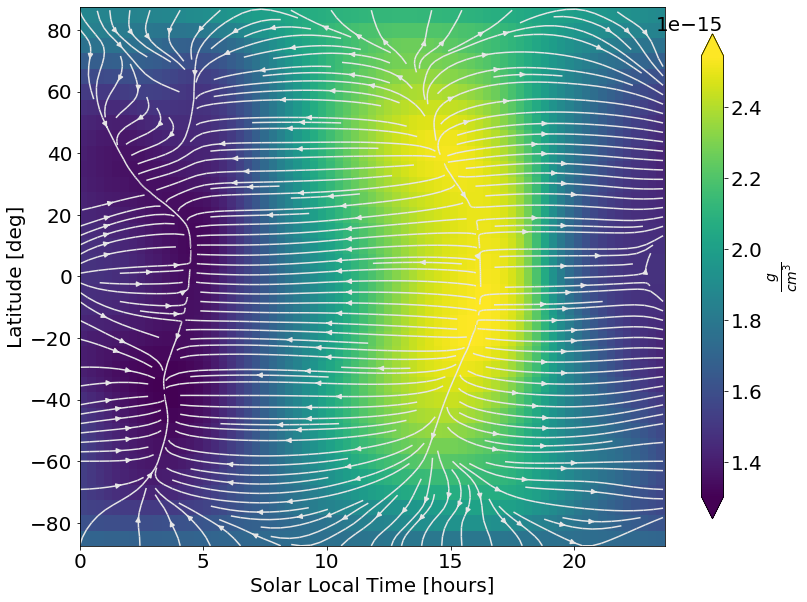

In [44]:
 
plt.rcParams['axes.grid'] = False
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 20})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 2

#rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)
plt.rcParams["legend.loc"] = 'best'

tiegcm = tiegcm_spring_equinox

#TIEGCM STUFF
lon = tiegcm['lon']
lat = tiegcm['lat']
ut  = tiegcm['ut']

ut_index = np.where(tiegcm['ut']==UT)[0][0]  # for tiegcm indexing
print(tiegcm['ut'][ut_index])
calc_slt = np.mod(lon/15 + ut[ut_index], 24)
slt  = np.sort(calc_slt)
islt = np.argsort(calc_slt)

x_tiegcm = slt
y_tiegcm = lat
X_tiegcm, Y_tiegcm = np.meshgrid(x_tiegcm, y_tiegcm)


interp_temp = np.zeros(  (np.size(tiegcm['lon']), np.size(tiegcm['lat'])))
for ilon,lonval in enumerate(tiegcm['lon']):
    for ilat,latval in enumerate(tiegcm['lat']):
        interp_temp[ilon, ilat] =  np.interp( alt*1e5  ,tiegcm['ZG'][ut_index, :,  ilat, ilon], tiegcm['TN'][ut_index,:,  ilat, ilon]) 

interp_den = np.zeros(  (np.size(tiegcm['lon']), np.size(tiegcm['lat'])))
for ilon,lonval in enumerate(tiegcm['lon']):
    for ilat,latval in enumerate(tiegcm['lat']):
        interp_den[ilon, ilat] =  np.exp( np.interp( alt*1e5  ,tiegcm['ZG'][ut_index,:,  ilat, ilon], np.log(tiegcm['DEN'][ut_index,:,  ilat, ilon]))  )



plot_data1_tiegcm = np.transpose(interp_temp)

plot_data2_tiegcm = np.transpose(interp_den*1e3) # NOTE UNIT CHANGE



# print( np.max([plot_data2_tiegcm.max(), plot_data2_msis.max()]))
# print(np.max([plot_data1_tiegcm.max(), plot_data1_msis.max()]))
# print(np.min([plot_data2_tiegcm.min(), plot_data2_msis.min()]))
# print(np.min([plot_data1_tiegcm.min(), plot_data1_msis.min()]))

param_units2 =  r'$\frac{g}{cm^3}$'
plot_title2 = 'Density'
x_string = 'Solar Local Time [hours]'
y_string = 'Latitude [deg]'
param_units =  'K'
plot_title1 = 'Temperature'


fig, (ax1) = plt.subplots(1 , figsize=(12, 9))
# fig.suptitle( 'Density Comparison \n 400 km, 12 UT,', y=1.025, size=22 )

dy, dx = np.gradient(-plot_data2_tiegcm/1000) # Flow goes down gradient (thus -zi)
ax1.streamplot(X_tiegcm, Y_tiegcm, dx, dy, color='0.9', density=2)


contours = ax1.pcolor(X_tiegcm, Y_tiegcm, plot_data2_tiegcm/1000)#, vmin = plot_data1_msis.min(), vmax= plot_data1_msis.max())
# contours_over = ax1.contour(X_tiegcm, Y_tiegcm, plot_data2_tiegcm/1000, 7, colors='black', linewidths= 1,linestyles= 'dotted' )
# ax1.set_title('TIEGCM '+plot_title2)
ax1.set(xlabel=x_string, 
        ylabel=y_string,)
#         title ='TIEGCM '+plot_title2 )
cbar = fig.colorbar(contours, extend='both', shrink=0.9, ax=ax1)
cbar.set_label(param_units2)




max_tiegcm_temp = x_tiegcm[np.where(plot_data1_tiegcm==plot_data1_tiegcm.max())[1][0]]
max_tiegcm_den = x_tiegcm[np.where(plot_data2_tiegcm==plot_data2_tiegcm.max())[1][0]]

# max_msis_temp = x_msis[np.where(plot_data1_msis==plot_data1_msis.max())[1][0]]
# max_msis_den = x_msis[np.where(plot_data2_msis==plot_data2_msis.max())[1][0]]

# ax1[0,0].axvspan(max_tiegcm_temp, max_tiegcm_temp+.2 ,facecolor='tab:red', alpha=0.6)
# ax1[0,1].axvspan(max_msis_temp, max_msis_temp+.25 ,facecolor='tab:red', alpha=0.6)
# ax1[1,0].axvspan(max_tiegcm_den-.7, max_tiegcm_den-.5, facecolor='tab:red', alpha=0.6)
# ax1[1,1].axvspan(max_msis_den, max_msis_den+.2, facecolor='tab:red', alpha=0.6)


fig.tight_layout( pad=1.5)
#     fig.savefig('ProjectPlots/Contour_TN_DEN_f107240' +".png")






